[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.1.2 CO2-Emissionen

In [6]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [8]:
%matplotlib inline
from FLUCCOplus.notebooks import *
import FLUCCOplus.electricitymap as elmap

In [9]:
em_raw = elmap.read_electricity_map()

data = (em_raw
        .pipe(elmap.start_pipeline)
        )

C:\Users\Simon Schneider\anaconda\envs\FLUCCOplus\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (21,22,26,30,31,35,36,39,40,41,42,43,47,48,64,72,77,89,90,92,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


read_electricity_map took 0:00:00.748609
start_pipeline took 0:00:00.019947 for (43823, 98) df


In [12]:
time = ["Jahr","Stunde"]
numerical = ["carbon_intensity_avg",
          "total_production_avg",
          "total_consumption_avg"]
titles = ["CO2 Intensität  [gCO2eq/kWh]", "Produktion [kWh]", "Verbrauch [kWh]"]
colors = ["slategrey", "rebeccapurple", "darkkhaki"]
data = data[time + numerical]

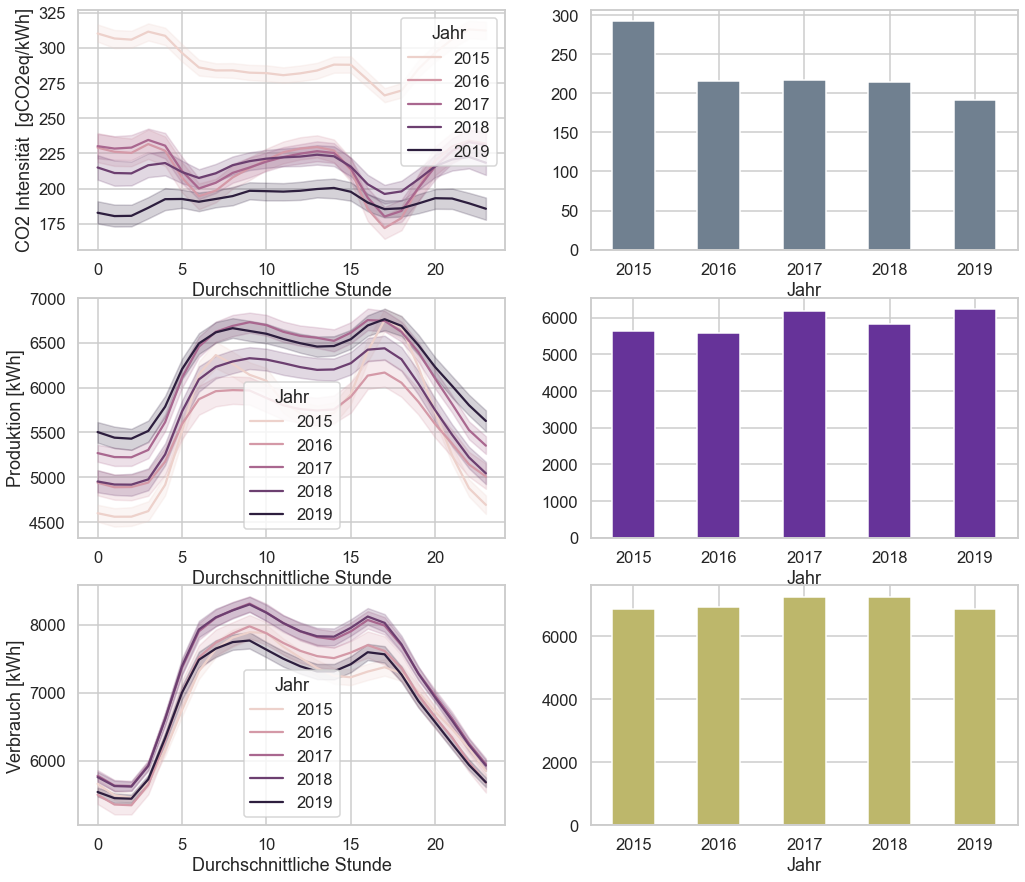

In [13]:
sns.set(style="whitegrid", palette=sns.cubehelix_palette(8), context="talk")

fig, ax = plt.subplots(3,2, figsize=(15,15))
for col, var in enumerate(numerical):
    sns.lineplot(x="Stunde", y=var, data=data, hue="Jahr", ax=ax[col][0]);
    data.groupby("Jahr")[var].mean().plot(kind="bar", rot=0, color=colors[col], ax=ax[col][1])
    ax[col][0].set(xlabel="Durchschnittliche Stunde",ylabel=titles[col])


